In [13]:
import pandas as pd
import matplotlib.pyplot as plt

minute_aggregation = pd.read_csv('Resources/cleaned_merged_minute_aggregate_data-2022-11-17.csv')
minute_df = pd.DataFrame(minute_aggregation)

In [14]:
# Change string to datetime
minute_df['time'] = pd.to_datetime(minute_df['time'])
# drop extra index column
minute_df = minute_df.drop(columns=minute_df.columns[0], axis=1)
# loc to timeframe of advertising data
minute_df = minute_df.loc[(minute_df['time'] >= '2022-01-01 00:00:00') & (minute_df['time'] <='2022-10-25 23:59:59')]
# drop columns
minute_df = minute_df.drop(['operator', 'channel', 'cleaned_content_id'], axis=1)
# filter by country
minute_df = minute_df.loc[(minute_df['country'] == 'United Kingdom')]
# remove space after comma for some genre entries for get dummies seperator
minute_df['genre'] = minute_df['genre'].str.replace(r'([ ]+,[ ]+)',",")
minute_df['genre'] = minute_df['genre'].str.strip()
# split genres with get dummies and drop genre column.  Clean data strip spaces from genre column names
minute_df = pd.concat([minute_df,minute_df.genre.str.get_dummies(sep=',')],1)
minute_df = minute_df.drop('genre', axis=1)
minute_df.columns = minute_df.columns.str.strip()
# check column names
print(minute_df.columns.values.tolist())
# filter by date and resample
minute_df = minute_df.loc[(minute_df['time'] >= '2022-01-01 00:00:00') & (minute_df['time'] <='2022-10-25 23:59:59')]
minute_df = minute_df.resample('D', on='time').sum().reset_index()
minute_df = minute_df.sort_values(['time'])

minute_df.dtypes

C:\Users\Peter Nguyen\AppData\Local\Temp\ipykernel_13216\2199381362.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  minute_df['genre'] = minute_df['genre'].str.replace(r'([ ]+,[ ]+)',",")
C:\Users\Peter Nguyen\AppData\Local\Temp\ipykernel_13216\2199381362.py:15: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  minute_df = pd.concat([minute_df,minute_df.genre.str.get_dummies(sep=',')],1)


['time', 'country', 'total_sessions', 'total_session_duration_seconds', 'region', '20TH CENTURY', 'ACID TECHNO', 'ACID-JAZZ', 'AFRO DANCE', 'AFRO HOUSE', 'AFRO-CUBAN JAZZ', 'AFRO-POP / AFROBEATS', 'AFROBEAT', 'ALTERNATIVE', 'ALTERNATIVE HIP-HOP', 'AMBIENT', 'ARABIC MUSIC', 'AVANT-GARDE JAZZ', 'BALLET', 'BAROQUE', 'BEBOP', 'BIG BAND', 'BLUE-EYED SOUL / A.O.R.', 'BLUES', 'BLUES ROCK', 'BOOGIE-FUNK', 'BOSSA NOVA', 'BOSSA-JAZZ', 'BOUNCE MUSIC', 'BRASS BAND', 'BREAKDANCE', 'BROKEN BEAT', 'CARIBBEAN MUSIC', 'CENTRAL AFRICAN MUSIC', 'CHAMBER MUSIC', 'CHAÂBI', 'CHICAGO BLUES', 'CLASSICAL', 'CLASSICAL CROSSOVER', 'CONCERTO', 'CONSCIOUS HIP HOP', 'CONTEMPORARY', 'CONTEMPORARY DANCE', 'CONTEMPORARY JAZZ', 'COOL JAZZ / WEST COAST JAZZ', 'COUNTRY BLUES', 'CROSSOVER JAZZ', 'DANCE', 'DARK AMBIENT', 'DARK TECHNO', 'DEEP HOUSE', 'DETROIT TECHNO', 'DIRTY SOUTH RAP', 'DISCO', 'DISCO HOUSE', 'DOWNTEMPO / CHILL OUT', 'DUBTRONICA', 'EAST COAST RAP', 'ELECTRO', 'ELECTRO HOUSE', 'ELECTRO JAZZ / NU-JAZZ', 'ELE

time                              datetime64[ns]
total_sessions                           float64
total_session_duration_seconds           float64
20TH CENTURY                               int64
ACID TECHNO                                int64
                                       ...      
TURKISH FOLK MUSIC                         int64
VOCAL JAZZ                                 int64
WEST AFRICAN MUSIC                         int64
WEST COAST RAP                             int64
ZOUK                                       int64
Length: 357, dtype: object

<AxesSubplot:title={'center':'Hourly Session Volume January 2022'}, xlabel='Time (Hourly)', ylabel='Total Sessions'>

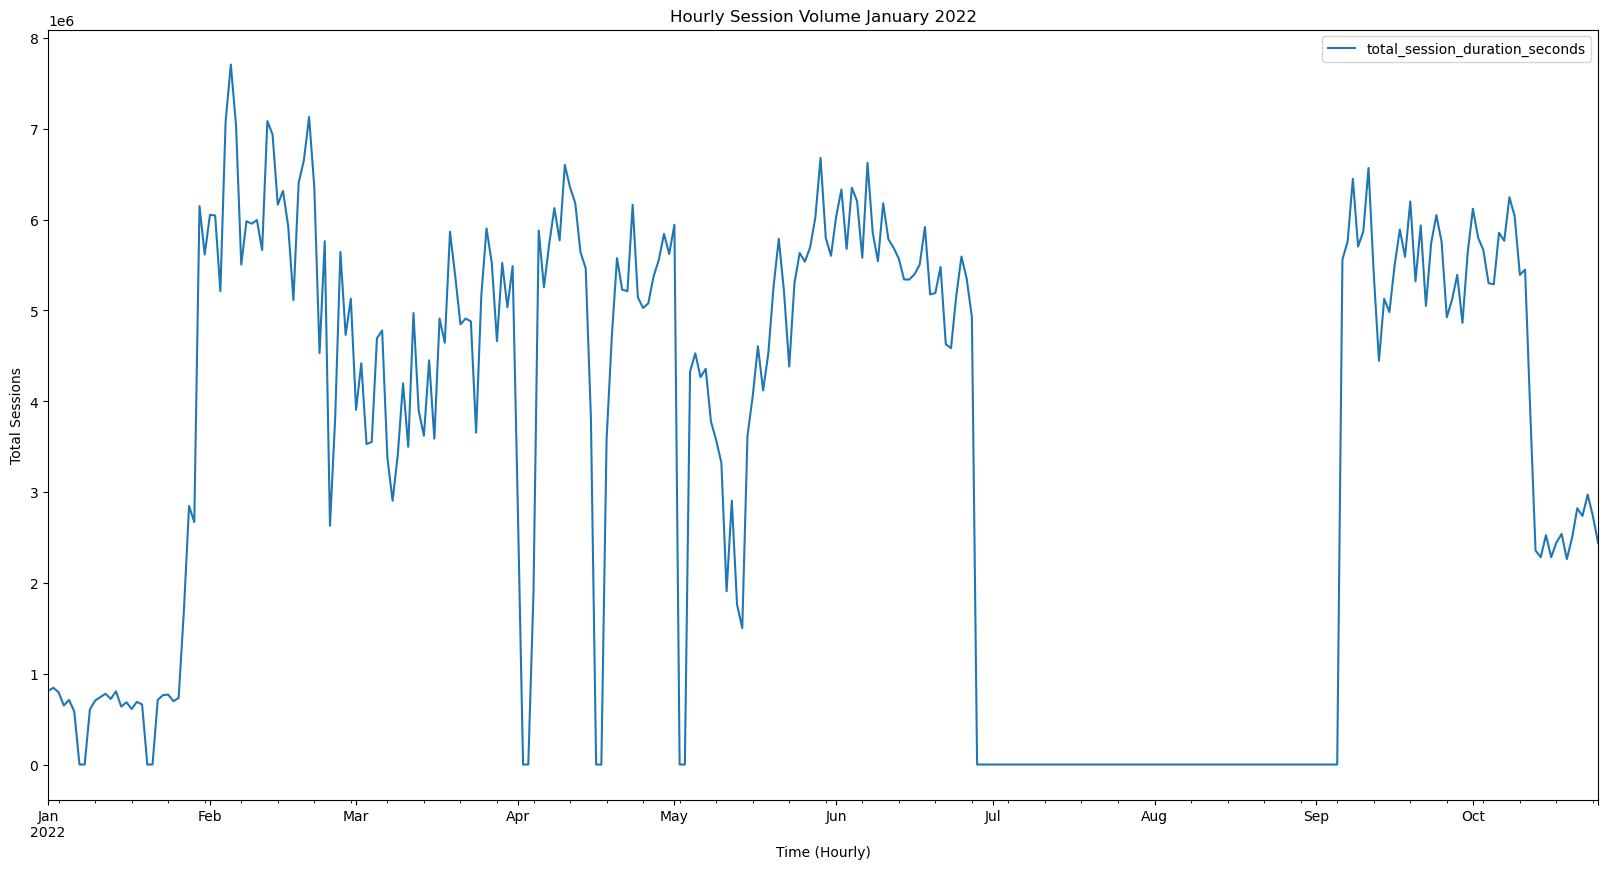

In [15]:
minute_df.plot(x= 'time',y= 'total_session_duration_seconds', kind='line', figsize=(20,10),xlabel='Time (Hourly)', ylabel = 'Total Sessions', title='Hourly Session Volume January 2022')